<a href="https://colab.research.google.com/github/RohanRanshinge/causal-inference/blob/main/zero-to-hero-bsts/PART_I-Bayesian-Statistics/04-Probability-Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Probability Distributions
Probability distributions describe the likelihood of different outcomes for a random event.

Here are a few ways to think about it:
* It's a comprehensive description of the possible values a random variable can take and the probabilities associated with each of these values.
* It can be viewed as a complete list of all potential outcomes, along with their respective probabilities.
* Probability distributions offer a visual representation of all possible events and the probability of each occurring.

## Probability Mass Function (PMF)
A Probability Mass Function (PMF) is a function that provides the probability that a discrete random variable is exactly equal to a specific value.

PMFs are useful when dealing with sample spaces composed of distinct, countable outcomes. For instance, a PMF can describe the probability of getting heads or tails in a coin flip, or the probability of rolling any specific face on a six-sided die.

Let's see some commonly used distributions that use PMFs:


## Bernoulli Distribution
The Bernoulli distribution is a discrete probability distribution that models a single trial of an experiment with precisely two possible outcomes: success or failure. It's  useful for situations where an event either happens or does not.

We can try understanding it using a coin flip:
* Let k = 1 for heads (success)
* k = 0 for tails (failure)

If p represents the probability of getting heads (success), then:
* The probability of getting heads: $P(k=1|p) = p$
* And the probability of getting tails: $P(k=0|p) = 1-p$

Combining these, the Probability Mass Function (PMF) for the Bernoulli distribution is given by:
$$P(k|p) = p^k *(1-p)^{1-k}$$
Where
* When k=1 (heads), the PMF simplifies to $p$
* When k=0 (tails), the PMF simplifies to $1-p$

This equation is also referred to as the **likelihood function**.

Note: A Bernoulli distribution is a special case of the binomial distribution where the number of trials n=1 (this will make sense in the next section)


## Binomial Distribution
Remember those questions we would get asked on what’s the probability of getting exactly 5 heads in 10 coin tosses etc? Well it’s time to solve them!

Enter Binomial Distributions!

The Binomial distribution is a discrete probability distribution that calculates the probability of obtaining a certain number of successful outcomes (k) in a fixed number of independent trials (n), given a constant probability of success (p) for each trial.

It displays all possible outcomes of k successes, within n trials with p probability.
*(If this sounds confusing, don’t fret the example below should clear it up)*

**“Bi”** in binomial refers to the two possible outcomes that we are concerned with: an event happening (success) or an event not happening (failure).

All binomial distributions contain three parameters:
* **k**: The number of outcomes we care about.
* **n**: The number of trials
* **p**: The probability of success on a single trial.

The Binomial Probability Mass Function (PMF) is given by:

$$B(k;n,p) =\binom{n}{k} *p^k *(1-p)^{n-k} $$
$$where \binom{n}{k} = \frac{n!}{k!  (n-k)!}$$

Let's break this equation down:
* $p^k$ represents the probability of observing k independent successes in one experiment.
* $(1-p)^{n-k}$	represents the probability of observing (n-k) failures together.
* $\binom{n}{k}$ (also written as nCk or (n choose k)) is the binomial coefficient. This term accounts for all possible combinations in which k successes can occur within n trials.

We typically describe a Binomial process using the notation:  
$Y \sim \text{Binomial}(n, p)$   
where $\sim$ stands for "is distributed as"

### Assumptions of the binomial distribution
1. The trials are independent
2. There are two possible outcomes (success and failure)
3. The probability of success is constant across trials

Using the above equation we can solve for any probabilities that have just 2 outcomes.  
For eg: ***what is the probability of getting 5 heads in 10 coin tosses?***  

$B(5;10,1/2) =\binom{10}{5} *(1/2)^5 *(1/2)^{10-5} $

### Plotting the Binomial Distribution
How does the above equation look in code?

The binom.pmf( ) function gives us the probability of seeing 5 heads in 10 coin tosses.

In [ ]:
from scipy.stats import binom
binom.pmf(5,10,1/2)

np.float64(0.24609375000000003)

### Wait, why is this not 50%?
This is a great question! Afterall, if the probability of heads is 50% and I toss a coin 10 times, then the probability of getting 5 heads should be 50% right?  
What you are thinking of is the expected value or the average result over many trials, but not the probability of a specific outcome.
* **Expected Value**
    * When you flip a coin 10 times, the expected number of heads is 5. This is because, on average, a fair coin will land on heads 50% of the time
    * However, the probability of getting exactly 5 heads in those 10 flips is different from the overall average.
* **Many Possible Outcomes**
    * When you toss a coin 10 times, there are  2^10  or 1024 possible sequences of heads and tails (e.g., HHHHHHHHHH, HHTHTTTHTH, etc.).
    * Only some of these sequences will have exactly 5 heads and 5 tails.
    * The calculation you saw before counts the number of ways to arrange 5 heads and 5 tails in a sequence of 10 flips.  

When you put this together you get 24.6%


### Plotting the Binomial Distribution
Remember at the start of this chapter I had said, probability distributions offer a visual representation of all possible events and the probability of each occurring.

So how would we visualize this?

Well the above equation now allows us to calculate the probability for any k successes using a fixed n and p.


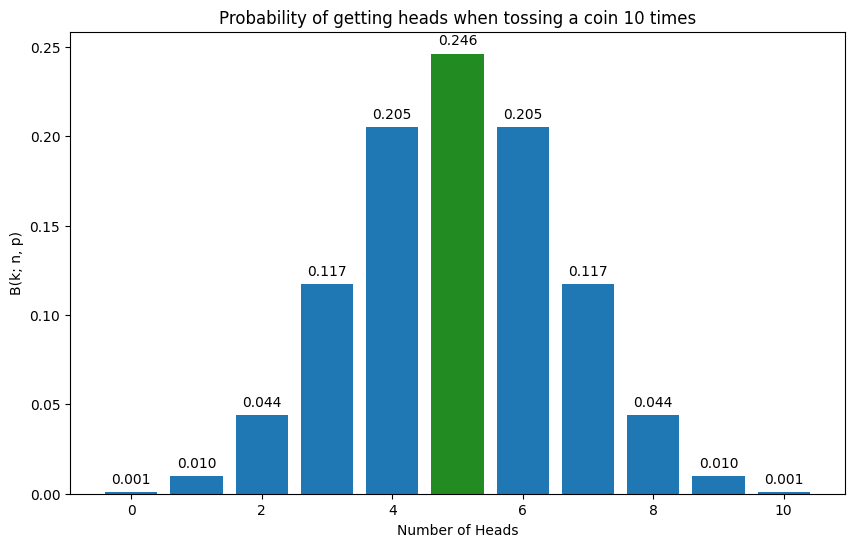

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Parameters for the binomial distribution
n = 10  # Number of trials (coin tosses)
p = 0.5  # Probability of success (getting heads)


# Generate the x-axis values (number of heads)
x = np.arange(0, n + 1)


# Calculate the probabilities for each number of heads
probs = binom.pmf(x, n, p)


# Create the plot with a larger size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
# Create a list of colors, highlighting the bar at x=5
colors = ['tab:blue'] * len(x)
colors[5] = 'forestgreen' # Set the color for x=5 to green

plt.bar(x, probs, color=colors)


# Add labels and title
plt.xlabel("Number of Heads")
plt.ylabel("B(k; n, p)")
plt.title("Probability of getting heads when tossing a coin 10 times")

# Add data labels on top of the bars
for i, prob in enumerate(probs):
    plt.text(x[i], prob + 0.005, f'{prob:.3f}', ha='center') # Add text slightly above the bar

# Display the plot
plt.show()

The above chart shows all possible events and the probability of each occurring when flipping a coin 10 times.


Okay let’s look at another example using a fair sided die.  
***Q2) What is the probability of getting four 5s when rolling a die 10 times***


In [ ]:
from scipy.stats import binom
binom.pmf(4,10,1/6)

np.float64(0.054265875850988195)

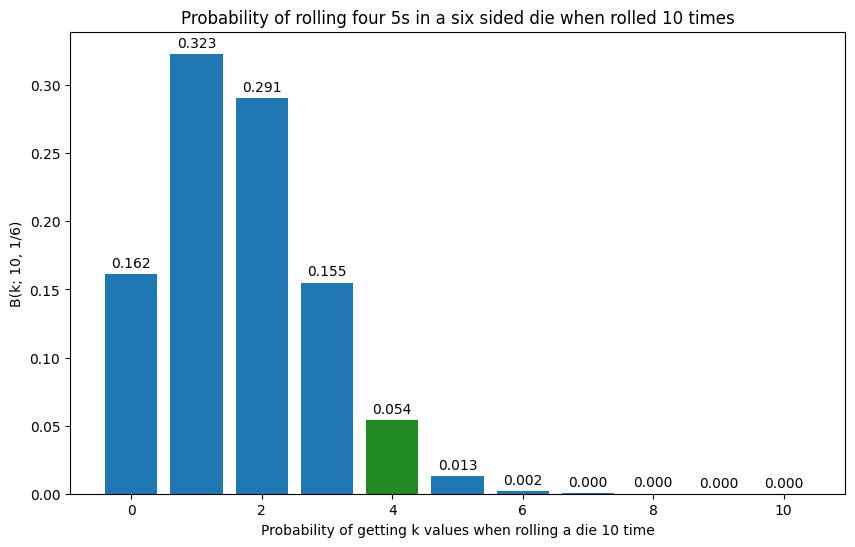

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Parameters for the binomial distribution
n = 10  # Number of trials
p = 1/6  # Probability of success


# Generate the x-axis values
x = np.arange(0, n + 1)


# Calculate the probabilities for each number of rolls
probs = binom.pmf(x, n, p)


# Create the plot with a larger size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list of colors, highlighting the bar at x=4
colors = ['tab:blue'] * len(x)
colors[4] = 'forestgreen' # Set the color for x=4 to green

plt.bar(x, probs, color=colors)


# Add labels and title
plt.xlabel("Probability of getting k values when rolling a die 10 time")
plt.ylabel("B(k; 10, 1/6)")
plt.title("Probability of rolling four 5s in a six sided die when rolled 10 times")

# Add data labels on top of the bars
for i, prob in enumerate(probs):
    plt.text(x[i], prob + 0.005, f'{prob:.3f}', ha='center') # Add text slightly above the bar
# Display the plot
plt.show()

If you are also asked the probability of getting **at least** four 5s when rolling a six sided die 10 times, you just have to add the bars of 4,5,6.


What would that look like?


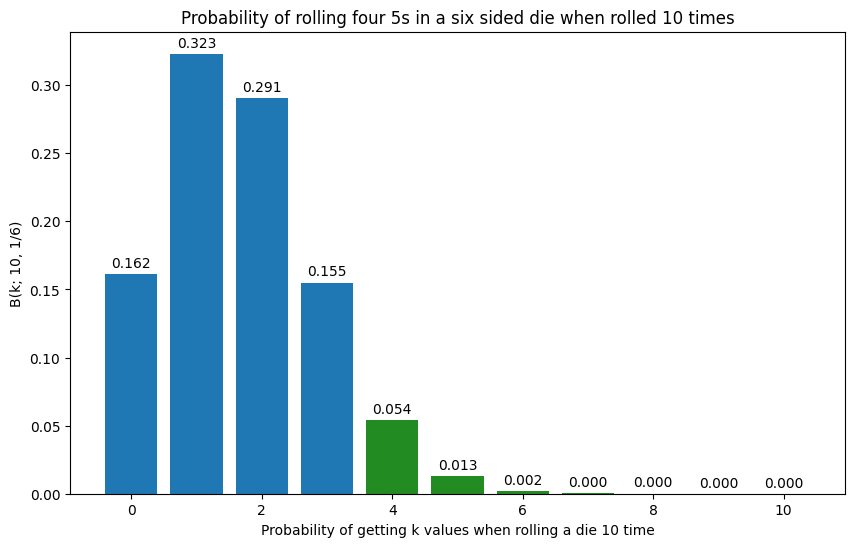

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom


# Parameters for the binomial distribution
n = 10  # Number of trials
p = 1/6  # Probability of success


# Generate the x-axis values
x = np.arange(0, n + 1)


# Calculate the probabilities for each number of rolls
probs = binom.pmf(x, n, p)


# Create the plot with a larger size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a list of colors, highlighting the bar at x=4
colors = ['tab:blue'] * len(x)
colors[4] = 'forestgreen' # Set the color for x=4 to green
colors[5] = 'forestgreen' # Set the color for x=5 to green
colors[6] = 'forestgreen' # Set the color for x=6 to green
colors[7] = 'forestgreen' # Set the color for x=7 to green

plt.bar(x, probs, color=colors)


# Add labels and title
plt.xlabel("Probability of getting k values when rolling a die 10 time")
plt.ylabel("B(k; 10, 1/6)")
plt.title("Probability of rolling four 5s in a six sided die when rolled 10 times")

# Add data labels on top of the bars
for i, prob in enumerate(probs):
    plt.text(x[i], prob + 0.005, f'{prob:.3f}', ha='center') # Add text slightly above the bar
# Display the plot
plt.show()

In [ ]:
from scipy.stats import binom
n = 10
p = 1/6
# Calculate the probability using the survival function (1 - cdf)
result = 1 - binom.cdf(3, n, p)
result


np.float64(0.0697278425544886)

Translation: There’s a 7% chance that you will see that specific number show up 4 or more times in 10 throws.

Now you may be wondering, oh coin flips and rolling a die are fine, but…


### How is this relevant to me?
Let’s look at few other examples that might be helpful


**Example 1: e-commerce business**  
An e-commerce website has a 2% conversion rate. If they have 500 visitors in a day, what is the probability that exactly 10 visitors make a purchase?


In [ ]:
from scipy.stats import binom
n = 500  # Total number of visitors (trials)
p = 0.02  # Probability of a single visitor making a purchase (conversion rate)
k = 10   # Number of purchases we are interested in (number of successes)
# We want the probability of getting exactly 10 purchases, which is P(X = 10).
result_ecommerce = binom.pmf(k, n, p)
print(f"Example 1 (E-commerce): The probability of exactly {k} purchases out of {n} visitors with a conversion rate of {p*100}% is: {result_ecommerce}")

Example 1 (E-commerce): The probability of exactly 10 purchases out of 500 visitors with a conversion rate of 2.0% is: 0.12637979106893046


**Example 2: Stock market**   
You pick 20 stocks, and there is a 5% chance that any single stock will be a "10x bagger".
What is the probability of picking exactly 3 "10x baggers" out of the 20 stocks?



In [ ]:
from scipy.stats import binom
n = 20  # Number of stocks picked (trials)
p = 0.05  # Probability of a single stock being a "10x bagger" (probability of success)
k = 3   # Number of "10x baggers" we are interested in (number of successes)
# We want the probability of getting exactly 3 "10x baggers", which is P(X = 3).
result_stocks = binom.pmf(k, n, p)
print(f"Example 2 (Stock Market): The probability of picking exactly {k} '10x baggers' out of {n} stocks with a {p*100}% chance for each is: {result_stocks}")


Example 2 (Stock Market): The probability of picking exactly 3 '10x baggers' out of 20 stocks with a 5.0% chance for each is: 0.05958214776873281


**Example 3: Exam**  
You are taking a multiple-choice test with 15 questions, and each question has 4 possible answers. You didn't study and decided to guess randomly on every question. What is the probability that you get at least 8 questions correct?


In [ ]:
# Parameters for the binomial distribution
n = 15  # Number of trials (questions)
p = 1/4  # Probability of success (guessing correctly)
# We want the probability of getting at least 8 questions correct, which is P(X >= 8).
# This is equal to 1 - P(X <= 7).
probability_scenario1 = 1 - binom.cdf(7, n, p)
print(f"The probability of getting at least 8 questions correct when guessing on 15 questions with 4 options each is: {probability_scenario1}")

The probability of getting at least 8 questions correct when guessing on 15 questions with 4 options each is: 0.017299838364124298


Q3.1) Suppose you quickly read through some of the material before the test, and your probability of answering each question correctly increases to 1/3. Does this increase make you twice as likely to get at least 8 questions correct compared to guessing randomly on all 15 questions?

In [ ]:
from scipy.stats import binom
# Parameters for the second scenario (improved guessing probability)
n_scenario2 = 15  # Number of questions (trials) remains the same
p_scenario2 = 1/3  # New probability of guessing a question correctly
# We want the probability of getting at least 8 questions correct, which is P(X >= 8).
# This is equal to 1 - P(X < 8) = 1 - P(X <= 7).
# So, we calculate the CDF at k=7 and subtract it from 1.
probability_scenario2 = 1 - binom.cdf(7, n_scenario2, p_scenario2)
print(f"The probability of getting at least 8 out of {n_scenario2} questions correct with a {round(p_scenario2*100, 2)}% chance per question is: {probability_scenario2}")
# Compare the probabilities
if probability_scenario2 >= 2 * probability_scenario1:
   print("\nYou are at least twice as likely to get at least 8 questions correct in the second scenario.")
else:
   print("\nYou are not twice as likely to get at least 8 questions correct in the second scenario.")

The probability of getting at least 8 out of 15 questions correct with a 33.33% chance per question is: 0.08823159840676364

You are at least twice as likely to get at least 8 questions correct in the second scenario.


Okay time to take a break! We’ll look at Beta distributions next!

## Beta Distribution
Earlier we saw that binomial distribution is used to find the probability of successful outcomes, given a number of trials and the probability of the successful outcome.

In Beta distribution, **we want to find the probability of success given we have observed the number of successful outcomes for a given number of trials.**

For example we would use beta distribution to find the probability of flipping heads when we have observed 50 tosses of a coin and 30 of those were heads.

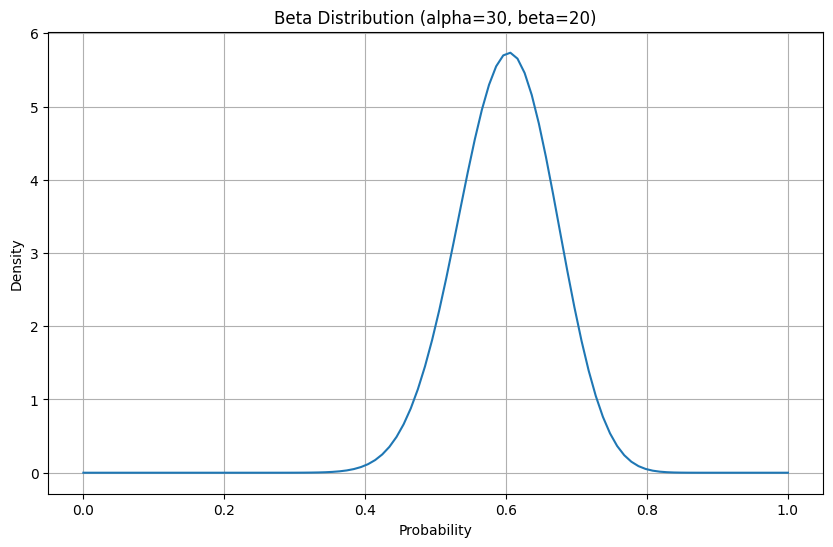

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Parameters for the Beta distribution
alpha = 30
beta_param = 20 # Renamed to avoid conflict with the beta function

# Generate x-values (probabilities)
x = np.linspace(0, 1, 100) # Beta distribution is defined for x between 0 and 1

# Calculate the probability density function (PDF) for each x-value
pdf_values = beta.pdf(x, alpha, beta_param)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Add labels and title
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title(f"Beta Distribution (alpha={alpha}, beta={beta_param})")
plt.grid(True)

# Display the plot
plt.show()

* Beta distribution is different from binomial distribution as in binomial distribution we are looking at the distribution of k, the number of outcomes we care about, which is always something we can count.  
* For beta distribution, we are looking at the distribution of p, for which we have an infinite number of possible values.
* The x axis of a beta distribution ranges from 0 to 1
* The y axis is the probability density and can be thought of as the weight of each hypothesis.

It's given by:
$$Beta(p;α,β) = \frac{p^{α-1}(1-p)^{β-1}}{beta(α,β)} $$
* p = probability of an event. This is our different hypothesis for the possible probabilities
* α = how many times we observe an event we care about
* β = how many times we observe the event we care about didn't happen

The mean of a beta distribution is given by  
$ μ =  \frac{α}{(α + β)}$  
$σ = \frac{(α*β)}{(α+β)^2*(α+β+1)}$


If you have a sense of the average probability and the variance you can plug it into the equations above to get alpha and beta values.

### Plotting Beta distributions for Various alpha and beta values
If you know the mean and variance of a beta distribution you can also use bigger or smaller values of alpha and beta to get different distributions based on your understanding of data (ie prior beliefs). If you are uncertain you can choose small values, if you have stronger beliefs you can choose larger values and still keep the mean and variance same.

This flexibility allows you to incorporate your existing knowledge or lack thereof into the model.



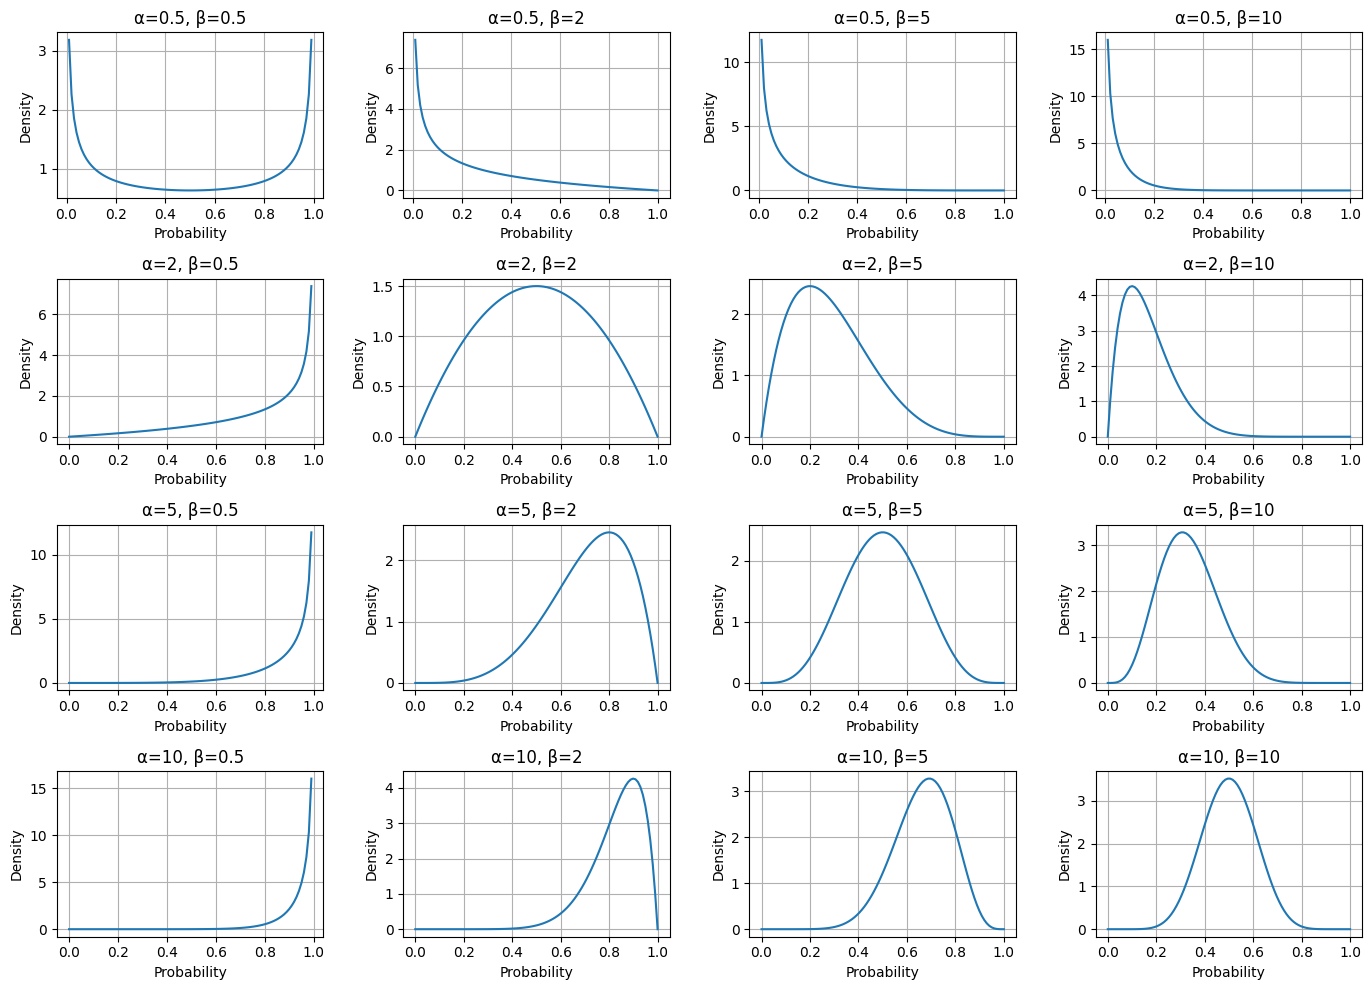

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Define a range of alpha and beta values to explore
alpha_values = [0.5,  2, 5, 10]
beta_values = [0.5, 2, 5, 10]

# Create a grid of subplots
fig, axes = plt.subplots(len(alpha_values), len(beta_values), figsize=(14, 10))

# Generate x-values (probabilities)
x = np.linspace(0, 1, 100)

# Iterate through the alpha and beta values and plot each distribution
for i, alpha in enumerate(alpha_values):
    for j, beta_param in enumerate(beta_values):
        # Calculate the probability density function (PDF)
        pdf_values = beta.pdf(x, alpha, beta_param)

        # Plot the distribution
        axes[i, j].plot(x, pdf_values)

        # Add titles and labels
        axes[i, j].set_title(f"α={alpha}, β={beta_param}")
        axes[i, j].set_xlabel("Probability")
        axes[i, j].set_ylabel("Density")
        axes[i, j].grid(True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the plot
plt.show()

In real life situations, we almost never know the true probabilities for events.

**That’s why the beta distribution is one of the most powerful tools for understanding data.**


### Is this a fair coin?
Let’s say you are flipping a coin and notice that you get 12 heads and 18 tails and want to know the probability that the chance of getting heads is less than or equal to 0.5


In [ ]:
import scipy.stats as stats
alpha = 12
beta = 18
threshold = 0.5
probability = stats.beta.cdf(threshold, alpha, beta)
print(probability)

0.867534551769495


OR you can also write this as

In [ ]:
from scipy.integrate import quad
from scipy.stats import beta
# Define the function to integrate
def integrand(p):
 return beta.pdf(p, 12, 18)
# Perform the integration
result, error = quad(integrand, 0, 0.5)
result

0.8675345517694951

If you had to find the probability that the chance of getting heads was greater than 0.5 you would change the above code blocks like so


In [ ]:
import scipy.stats as stats
alpha = 12
beta = 18
threshold = 0.5
probability = 1- stats.beta.cdf(threshold, alpha, beta)
print(probability)


0.132465448230505


In [ ]:
from scipy.integrate import quad
from scipy.stats import beta
# Define the function to integrate
def integrand(p):
 return beta.pdf(p, 12, 18)
# Perform the integration
result, error = quad(integrand, 0.5, 1)
result


0.13246544823050507

### Betting on Mbappe
Your friend has recently gotten into sports betting and loves watching Real Madrid. He wants to bet on Madrid forward Kylian Mbappe scoring a goal in the first game of the season and has asked for your help.

He is willing to bet only if there is at least a 0.5 probability that Mbappe’s scoring chance is greater than 70%. Should he make the bet?


You decide to pull up Mbappe’s stats and see that he has scored 332 goals in 462 games.   
That makes α=332 and β=130


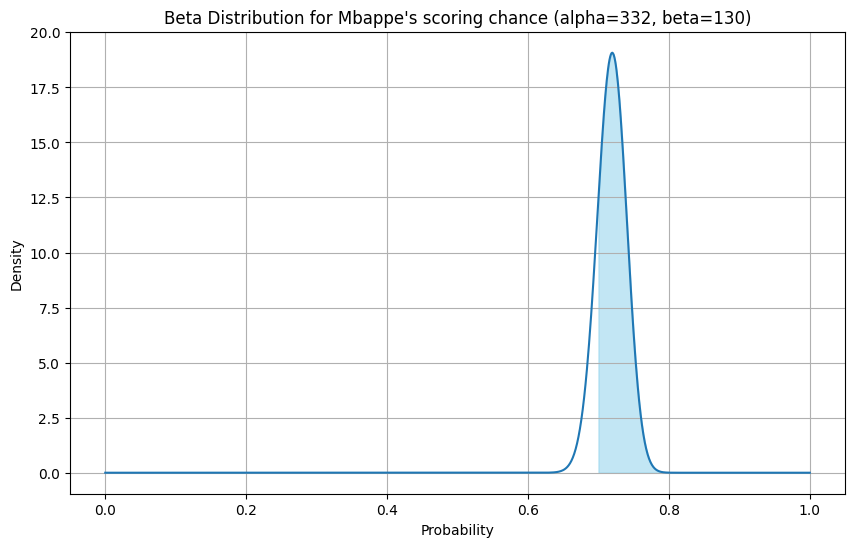

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Parameters for the Beta distribution based on Mbappe's stats
alpha = 332
total_games = 462
beta_param = total_games - alpha

# Generate x-values (probabilities)
x = np.linspace(0, 1, 1000) # Beta distribution is defined for x between 0 and 1

# Calculate the probability density function (PDF) for each x-value
pdf_values = beta.pdf(x, alpha, beta_param)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Highlight the area under the curve from 0.7 to 1
x_fill = np.linspace(0.7, 1, 100)
pdf_fill = beta.pdf(x_fill, alpha, beta_param)
plt.fill_between(x_fill, pdf_fill, color='skyblue', alpha=0.5)


# Add labels and title
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title(f"Beta Distribution for Mbappe's scoring chance (alpha={alpha}, beta={beta_param})")
plt.grid(True)

# Display the plot
plt.show()

Looking at the x axis you can see that all data is less than 0.8. We want to know how much exactly is above 0.7, the value our friend cares about for the bet (highlighted in blue above).

In [44]:
from scipy.stats import beta

# Parameters for the beta distribution based on Mbappe's stats
# Alpha is the number of successes (goals)
alpha = 332
# Beta is the number of failures (games without scoring)
total_games = 462
beta_param = total_games - alpha

# Calculate the integral from 0.7 to 1
# This is equivalent to 1 - CDF(0.7)
threshold = 0.7
probability = 1 - beta.cdf(threshold, a=alpha, b=beta_param)

print(f"The probability that Mbappe's chance of scoring is greater than {threshold*100}% is: {probability}")

# Check if this probability is greater than 0.5
bet_condition = 0.5
if probability > bet_condition:
    print(f"Since the probability ({probability:.4f}) is greater than {bet_condition}, you might consider making the bet.")
else:
    print(f"Since the probability ({probability:.4f}) is not greater than {bet_condition}, he should consider making the bet.")

The probability that Mbappe's chance of scoring is greater than 70.0% is: 0.8140788834249968
Since the probability (0.8141) is greater than 0.5, you might consider making the bet.


## Normal Distribution
A normal distribution is a continuous probability distribution that is shaped like a bell curve that best describes the strength of possible beliefs in the the value of an uncertain measurement, given a known mean and standard deviation.


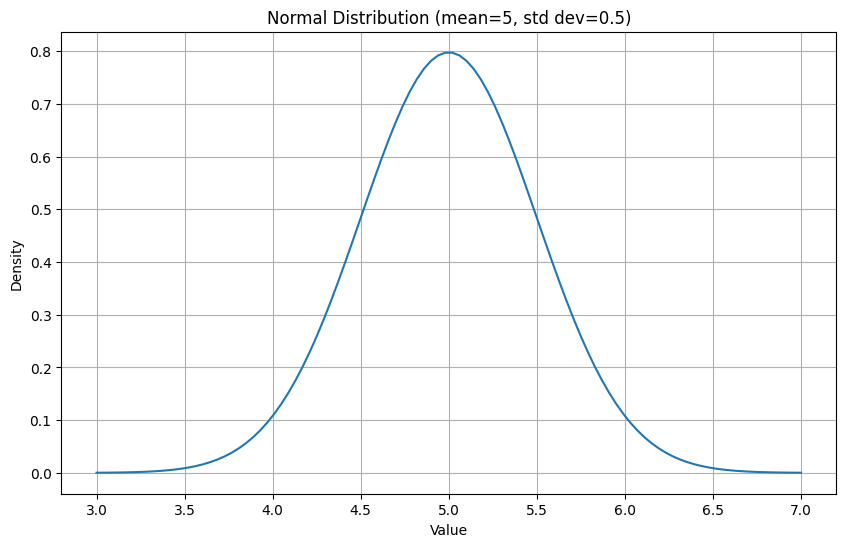

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 5
std_dev = 0.5

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 100) # Generate x-values around the mean

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Normal Distribution (mean={mean}, std dev={std_dev})")
plt.grid(True)

# Display the plot
plt.show()


*  The peak of the distribution is centered around the mean. The spread of the distribution is controlled by the standard deviation
*  The distribution is shown with a smooth curve instead of discrete bars.
* The area under the curve always equals 1  
* The y axis is labeled density because the normal pdf returns a probability density instead of an actual probability

The Probability Density Function (PDF) for a normal distribution is given by:
$$f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

Where:

* x is the random variable
* μ (mu) is the mean of the distribution
* σ (sigma) is the standard deviation of the distribution
* π (pi) ≈ 3.14159
* e is Euler's number ≈ 2.71828




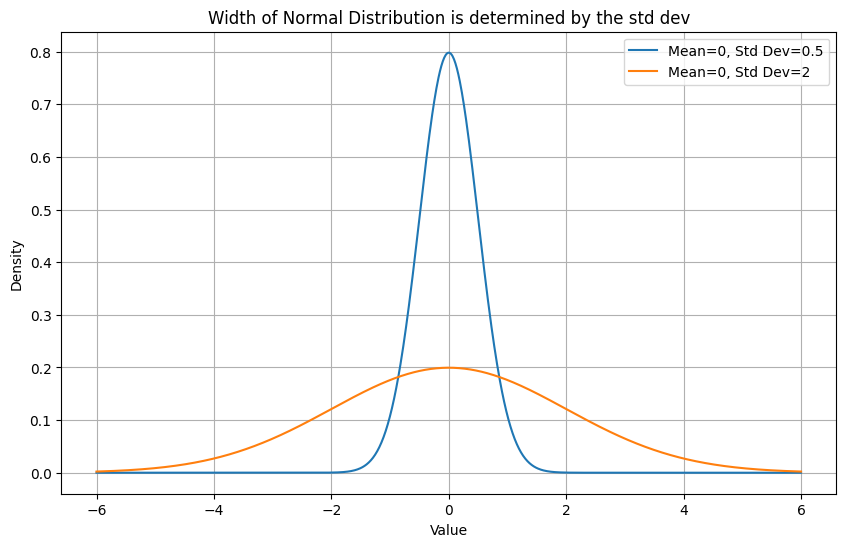

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the first Normal distribution
mean1 = 0
std_dev1 = 0.5

# Parameters for the second Normal distribution
mean2 = 0
std_dev2 = 2

# Generate x-values (covering a reasonable range for both distributions)
x = np.linspace(-6, 6, 1000)

# Calculate the probability density function (PDF) for each x-value
pdf_values1 = norm.pdf(x, mean1, std_dev1)
pdf_values2 = norm.pdf(x, mean2, std_dev2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values1, label=f'Mean={mean1}, Std Dev={std_dev1}')
plt.plot(x, pdf_values2, label=f'Mean={mean2}, Std Dev={std_dev2}')


# Add labels and title
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Width of Normal Distribution is determined by the std dev")
plt.grid(True)
plt.legend() # Add a legend to identify the distributions

# Display the plot
plt.show()

The Normal distribution shows how strongly we believe in our mean. If we are unsure and our observations are scattered, we allow a wider range of values (similar to the orange line), conversely, if all our observations are similar (ie small std dev) we believe our mean is accurate (blue line)

To find the actual probability of a value lying between x1 and x2 we need to integrate the function for these limits.

Normal distributions have a great feature where 68% of the data lies within 1std from the mean, 95% of the data lies between 2std and 99% of the data lies between 3std.

### Catching the plane
Imagine you have booked a vacation to Hawaii and are really excited to take a break from work and just drink beers on the beach. You are wondering how far in advance you should reach the airport so that you can comfortably clear security and board the plane and not have to run through the terminal when the doors are just about to close.   
You try to remember your last 5 airport visits and recall that it took you around 35, 40, 45, 55 and 60 minutes to get through security.  
Your partner assures you that this time it will be different and that you will be done with security within 30 mins and that you should leave accordingly. Afterall, why go early and wait at the terminal!?

You being the overprepared traveller are not so convinced - none of the times up until now took less than 30 mins, what are the chances of it being different this time?

Looking at the data the mean μ =47 and standard deviation σ =9.27  

You now want to know what is the probability, given the data you have observed, that you will be done with security within 30 mins. Since you hate the thought of missing your vacation you want to be 90% sure you’ll make it on time.

Using our previous pdf equation

$$N(\mu, \sigma) = \frac{1}{\sqrt{2\pi}\,\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$

To get the probability, we need to integrate this function over all values less than 30
$$ ∫_{-∞}^{30} N(\mu = 47, \sigma = 9.27)$$


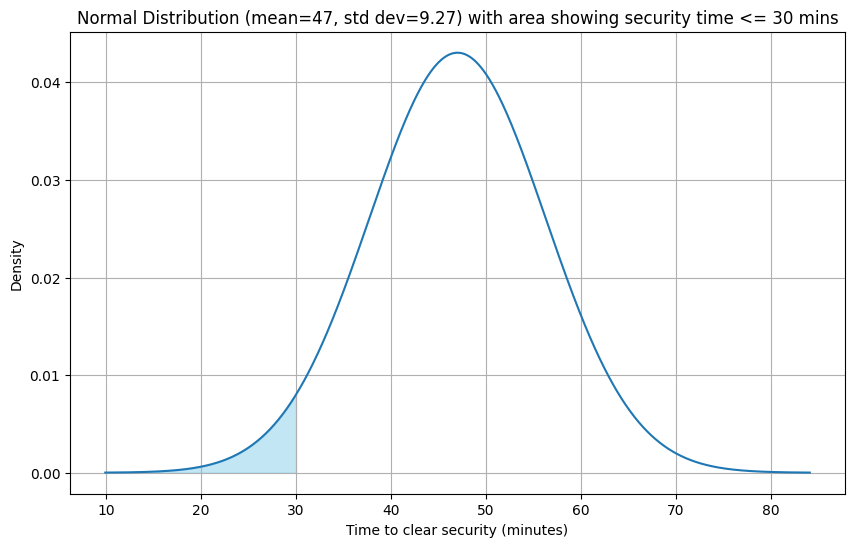

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 47
std_dev = 9.27

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values)

# Highlight the area under the curve from -infinity to 30
x_fill = np.linspace(mean - 4 * std_dev, 30, 100)
pdf_fill = norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, pdf_fill, color='skyblue', alpha=0.5)

# Add labels and title
plt.xlabel("Time to clear security (minutes)")
plt.ylabel("Density")
plt.title(f"Normal Distribution (mean={mean}, std dev={std_dev}) with area showing security time <= 30 mins")
plt.grid(True)

# Display the plot
plt.show()

The area of the shaded region represents the probability of getting done with security within 30 mins or less given the observations

You’ll notice that even though none of the observations were less than 30 mins we still see possible values less than 30 mins due to the spread or standard deviation of the distribution.

Calculating the integral we get:

In [11]:
from scipy.stats import norm

# Parameters for the normal distribution
mean = 47
std_dev = 9.27

# Calculate the integral from -infinity to 30 using the CDF
probability = norm.cdf(30, loc=mean, scale=std_dev)

print(f"The integral of the normal distribution with mean={mean} and std dev={std_dev} from -infinity to 30 is: {probability}")

The integral of the normal distribution with mean=47 and std dev=9.27 from -infinity to 30 is: 0.033336445863857034


We see that P(wait time < 30) = 3.3%, telling us there is only a 3% chance that you will be done with security within 30 mins.   
Since you wanted to be 90% sure that you will make the plane on time you decide that this is not worth the risk and do what you always have done - reach 2 hours before takeoff and sit at the gate doom scrolling.


### Key Takeaways

Normal distributions are great because we can think of a wide range of possibilities when we only know the mean and standard deviation of our data.

For any normal distribution with a known mean and standard deviation, we can estimate the area under the curve around the mean in terms of the standard deviation.
* 68% of all possible values lie within 1 standard dev of the mean
* 95% of all values lie within 2 standard dev of the mean
* 99.7% of all values lie within 3 standard dev of the mean

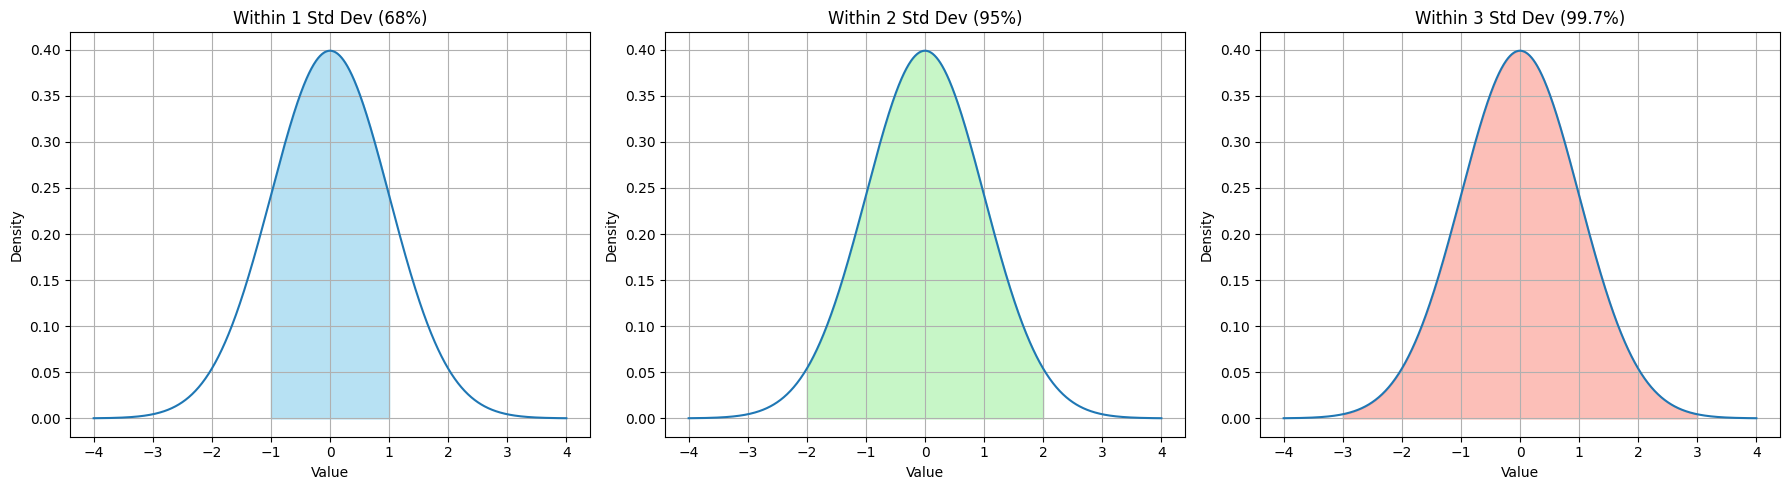

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters for the Normal distribution
mean = 0  # Using a standard normal distribution for simplicity
std_dev = 1

# Generate x-values
x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, 1000)

# Calculate the probability density function (PDF) for each x-value
pdf_values = norm.pdf(x, mean, std_dev)

# Create a figure with three subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

# Plot for 1 standard deviation
axes[0].plot(x, pdf_values)
x_fill_1std = np.linspace(mean - std_dev, mean + std_dev, 100)
pdf_fill_1std = norm.pdf(x_fill_1std, mean, std_dev)
axes[0].fill_between(x_fill_1std, pdf_fill_1std, color='skyblue', alpha=0.6)
axes[0].set_title('Within 1 Std Dev (68%)')
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")
axes[0].grid(True)

# Plot for 2 standard deviations
axes[1].plot(x, pdf_values)
x_fill_2std = np.linspace(mean - 2 * std_dev, mean + 2 * std_dev, 100)
pdf_fill_2std = norm.pdf(x_fill_2std, mean, std_dev)
axes[1].fill_between(x_fill_2std, pdf_fill_2std, color='lightgreen', alpha=0.5)
axes[1].set_title('Within 2 Std Dev (95%)')
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Density")
axes[1].grid(True)

# Plot for 3 standard deviations
axes[2].plot(x, pdf_values)
x_fill_3std = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
pdf_fill_3std = norm.pdf(x_fill_3std, mean, std_dev)
axes[2].fill_between(x_fill_3std, pdf_fill_3std, color='salmon', alpha=0.5)
axes[2].set_title('Within 3 Std Dev (99.7%)')
axes[2].set_xlabel("Value")
axes[2].set_ylabel("Density")
axes[2].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles and labels
plt.show()

This is very useful for assessing the likelihood of a value given even very less data.

## Mission Complete: Summary
This chapter was all about getting a solid grip on probability distributions. We started with the basics, like probability mass functions (PMFs), and how they help us understand discrete variables.

* We covered Bernoulli distribution, which is great for single "yes/no" situations
* the Binomial distribution, which handles multiple independent trials with those same two outcomes.
    * We even walked through some real-world examples, from simple coin flips and dice rolls to things like e-commerce conversion rates and predicting stock market movements, showing how these distributions can help us figure out the likelihood of different outcomes.
* We took a look at the Beta distribution. This one's really useful for figuring out the probability of success when you've already seen some results, which is a bit different from how the Binomial distribution focuses on the number of successes.
* Finally we saw the Normal distribution which is super important for modeling continuous data.

By wrapping our heads around these distributions and why they work, we've built a foundation for tackling more advanced statistical modeling.

## Skill Tree Extensions: Recommended Readings
* Bayesian Statistics for Beginners [book](https://a.co/d/0mdF1pj) (Donovan and Mickey)
* Bayesian Statistics the Fun Way [book](https://a.co/d/dLdYfSo) (Will Kurt)
* Doing Bayesian Data Analysis [book](https://a.co/d/7l2mfs1) (John Kruschke)
